### This script contains the following points:
#### Section 1. Importing Libraries, Defining Project Path, Importing Dataset as "df_prep"

#### Section 2a. Creating subset with only quantitative variables as "df_exp"

#### Section 2b. Standardizing the data using MinMaxScaler()

#### Section 3. The Elbow Technique

#### Section 4. k-Means clustering

#### Section 5a. Plot the clusters for the "# Hired Guides" and "# Members Summited" variables

#### Section 5b. Plot the clusters for the "# Hired Guides" and "Total Days" variables

#### Section 5c. Plot the clusters for the "is_o2_used" and "max_elev_reached" variables

#### Section 6. Observations about the clusters

#### Section 7. Calculating descriptive stats for clusters¶

#### Section 8. Additional observations about results and next steps

## Section 1. Importing Libraries, Defining Project Path, Importing Datasets

In [1]:
# Importing pandas, numpy, and os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Defining project folder path
path = r'C:\Users\prena\05-2023 Himalayan Expeditions Analysis'

In [4]:
path

'C:\\Users\\prena\\05-2023 Himalayan Expeditions Analysis'

In [5]:
# Importing expeditions_peak_recent_subset_2.pkl dataset as "df_exp"
df_prep = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'expeditions_peak_30yrs_USE_THIS_2.pkl'))

In [6]:
df_prep.shape

(5776, 31)

In [7]:
df_prep.head()

,Unnamed: 0,peak_id,peak_name,nationality,year,season,bc_arrived,bc_left,summit_day,total_days,...,is_o2_descent,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2_unused,is_o2_unkwn_2,o2_check,Elev Reached Category,Result Category,Oxygen Category
0,69,AMAD,Ama Dablam,Austria,1990,Autumn,1990-10-01,1990-10-12,1990-10-11,11,...,0,0,0,0,0,0,1,Tier 2,Unsuccessful,Not Used
1,70,AMAD,Ama Dablam,Germany,1990,Autumn,1990-10-07,1990-10-28,1990-10-22,21,...,0,0,0,0,0,0,1,Tier 3,Successful,Not Used
2,73,AMAD,Ama Dablam,United States of America,1990,Autumn,1990-10-30,1990-11-13,1990-11-12,14,...,0,0,0,0,0,0,1,Tier 3,Unsuccessful,Not Used
3,75,AMAD,Ama Dablam,Norway,1990,Winter,1990-11-20,1990-12-07,1990-12-02,17,...,0,0,0,0,0,0,1,Tier 3,Successful,Not Used
4,77,AMAD,Ama Dablam,New Zealand,1990,Winter,1990-12-02,1990-12-05,1990-12-04,3,...,0,0,0,0,0,0,1,Tier 3,Successful,Not Used


## Section 2a. Creating subset with only quantitative variables

In [8]:
# Create subset containing only quantitative variables
df_exp = df_prep[['total_days','max_elev_reached','total_mbrs','mbrs_summited','mbrs_deaths','hired_abc','hired_summits','hired_deaths']]

In [9]:
df_exp.shape

(5776, 8)

In [10]:
df_exp.head()

,total_days,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths
0,11,6200,3,0,0,0,0,0
1,21,6814,4,4,0,2,0,0
2,14,6600,7,0,0,0,0,0
3,17,6814,6,3,0,0,0,0
4,3,6814,1,1,0,0,0,0


## 2b. Standardizing the data

In [11]:
# define standard scaler
scaler = preprocessing.MinMaxScaler()

In [12]:
# scale the data and learn the scaling parameters
scaler.fit_transform(df_exp)

array([[0.14285714, 0.32051282, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.47794872, 0.1875    , ..., 0.06666667, 0.        ,
        0.        ],
       [0.18571429, 0.42307692, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15714286, 0.56102564, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.74285714, 0.56102564, 0.4375    , ..., 0.13333333, 0.125     ,
        0.        ],
       [0.57142857, 0.56102564, 0.        , ..., 0.03333333, 0.04166667,
        0.        ]])

In [13]:
# Assign array to 'arr_scaled'
arr_scaled = scaler.fit_transform(df_exp)

In [14]:
arr_scaled

array([[0.14285714, 0.32051282, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.28571429, 0.47794872, 0.1875    , ..., 0.06666667, 0.        ,
        0.        ],
       [0.18571429, 0.42307692, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15714286, 0.56102564, 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [0.74285714, 0.56102564, 0.4375    , ..., 0.13333333, 0.125     ,
        0.        ],
       [0.57142857, 0.56102564, 0.        , ..., 0.03333333, 0.04166667,
        0.        ]])

In [15]:
#Convert array to dataframe
df_scaled = pd.DataFrame(arr_scaled)

In [16]:
#Checking df_scaled
df_scaled.head()

,0,1,2,3,4,5,6,7
0,0.142857,0.320513,0.1250,0.0000,0.0,0.000000,0.0,0.0
1,0.285714,0.477949,0.1875,0.2500,0.0,0.066667,0.0,0.0
2,0.185714,0.423077,0.3750,0.0000,0.0,0.000000,0.0,0.0
3,0.228571,0.477949,0.3125,0.1875,0.0,0.000000,0.0,0.0
4,0.028571,0.477949,0.0000,0.0625,0.0,0.000000,0.0,0.0


## Section 3. The Elbow Technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
# Using scaled data, Creates a score that represents 
# a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] 

score

[-1171.795281412348,
 -793.5604850519118,
 -563.7709804403071,
 -491.6004575450631,
 -439.3667043055657,
 -395.00485627694263,
 -368.06504713157176,
 -342.91687053845885,
 -320.7227920520243]

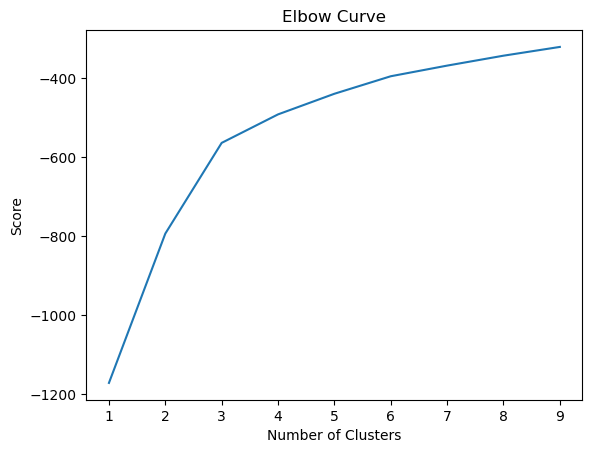

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a distinct corner at 3 clusters, but the curve still continues to climb at (what looks to be) a pretty significant rate. Nonetheless, I'm going to continue with 3 clusters to see what the data looks like.

## Section 4. k-Means Clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=3)

In [22]:
# Create 'clusters' column in our original dataframe
df_exp['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\prena\AppData\Local\Temp\ipykernel_8788\1739665107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['clusters'] = kmeans.fit_predict(df_scaled)


In [23]:
df_exp.head()

,total_days,max_elev_reached,total_mbrs,mbrs_summited,mbrs_deaths,hired_abc,hired_summits,hired_deaths,clusters
0,11,6200,3,0,0,0,0,0,2
1,21,6814,4,4,0,2,0,0,2
2,14,6600,7,0,0,0,0,0,2
3,17,6814,6,3,0,0,0,0,2
4,3,6814,1,1,0,0,0,0,2


In [24]:
# Check the value counts for clusters column
df_exp['clusters'].value_counts()

0    2529
2    2123
1    1124
Name: clusters, dtype: int64

## Section 5a. Plot the clusters for the "# Hired Guides" and "# Members Summited" variables

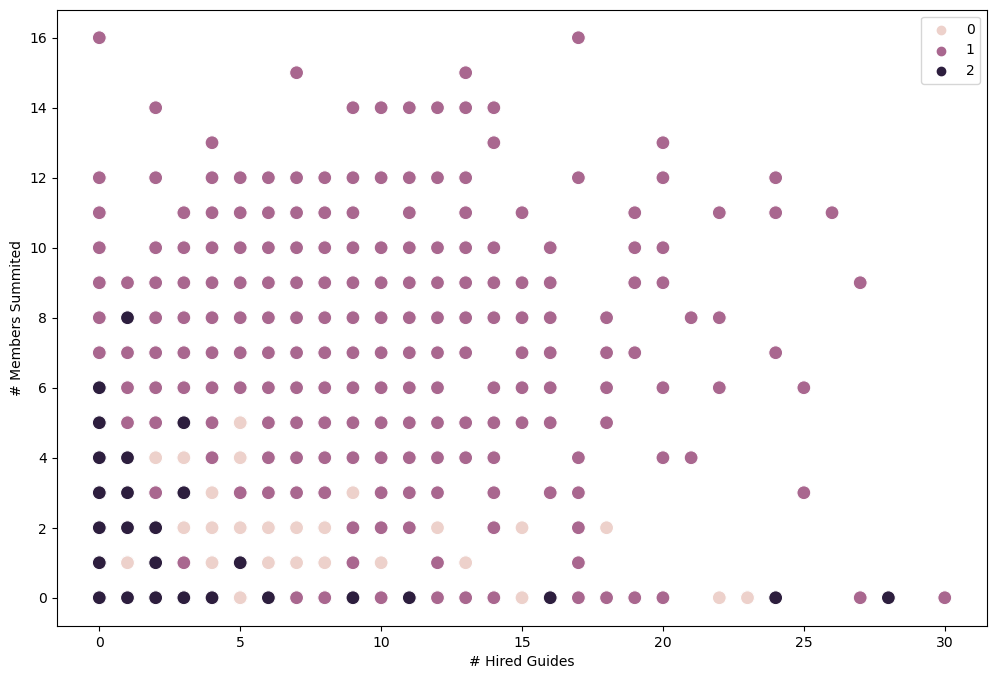

In [25]:
# Plot the clusters for the "# Hired Guides" and "# Members Summited" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_exp['hired_abc'], y=df_exp['mbrs_summited'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('# Hired Guides') # Label x-axis.
plt.ylabel('# Members Summited') # Label y-axis.
plt.show()

## Section 5b. Plot the clusters for the "# Hired Guides" and "Total Days" variables

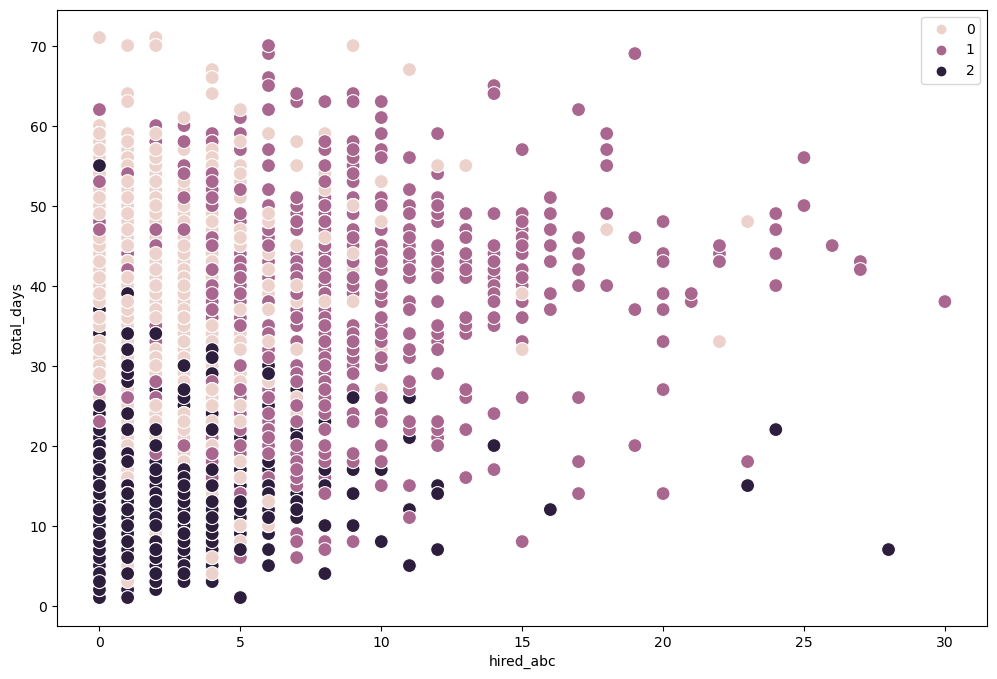

In [26]:
# Plot the clusters for the "# Hired Guides" and "Total Days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_exp['hired_abc'], y=df_exp['total_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('hired_abc') # Label x-axis.
plt.ylabel('total_days') # Label y-axis.
plt.show()

## Section 5c. Plot the clusters for the "# Hired Guides" and "# Member Deaths" variables

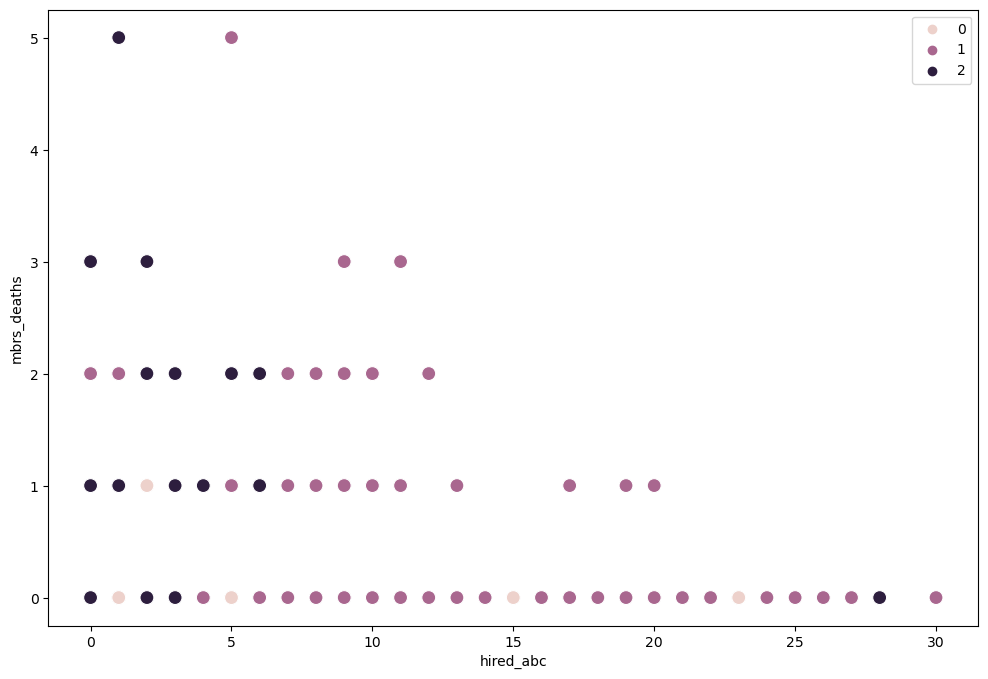

In [27]:
# Plot the clusters for the "# Hired Guides" and "# Member Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_exp['hired_abc'], y=df_exp['mbrs_deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('hired_abc') # Label x-axis.
plt.ylabel('mbrs_deaths') # Label y-axis.
plt.show()

## Section 5d. Plot the clusters for "Max Elevation Reached" and "Total Days"

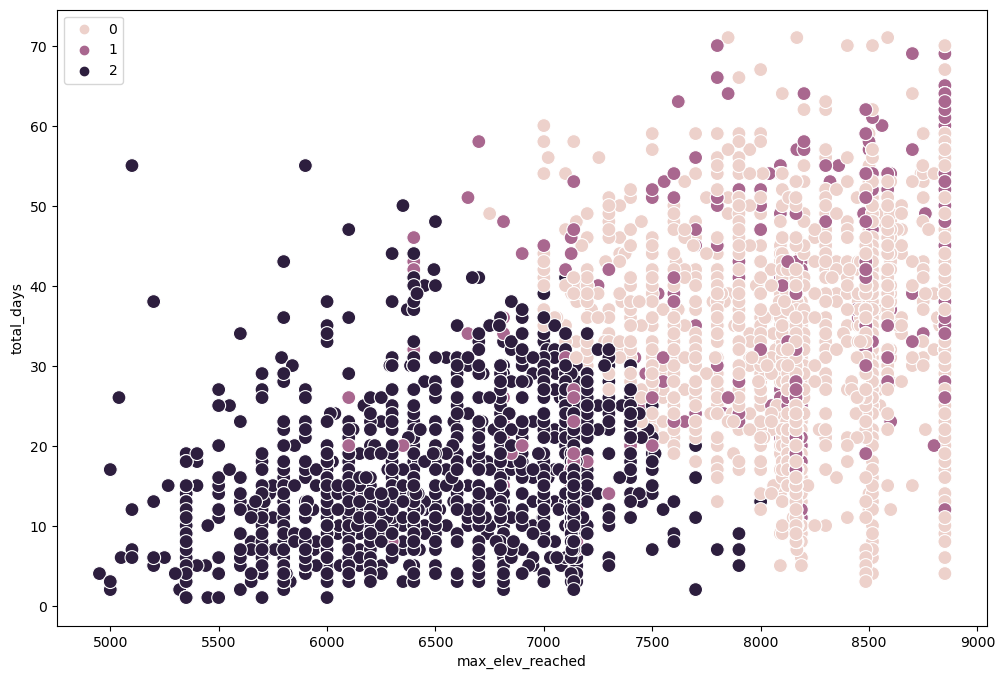

In [28]:
# Plot the clusters for the "Max Elevation Reached" and "Total Days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_exp['max_elev_reached'], y=df_exp['total_days'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('max_elev_reached') # Label x-axis.
plt.ylabel('total_days') # Label y-axis.
plt.show()

## Section 6. Observations about the clusters

In each of the above graphs, the clusters don't seem to make sense, as many of the clusters span both the x and y axis in most scenarios. Below I have specific notes on clusters for each pair of variables shown above:

<b>"# Hired Guides" and "# Members Summited" variables:</b> 

In this plot, all three clusters look to span the x-axis (# of hired guides). One interesting point is that on the y-axis (# of members summited), the dark purple cluster looks to be the only cluster that exceeds 9 members summited. 

This graph could suggest that the dark purple cluster represents larger groups of expeditions.

<b>"# Hired Guides" and "Total Days" variables</b>

In this plot:
- The purple cluster looks to be concentrated in the 0-7 range for hired guides and the 0-30 range for total days.
- The pink cluster looks to also be concentrated in the 0-7 range for hired guides, but then spans the 0-70+ range for total days.
- The dark cluster looks to be concentrated in the 3-30 range for hired guides and the entire span of the y-axis (0-70) for total days.

All of this to say, these clusters are not very distinct and there is a lot of overlap. Though there are some areas were I could argue it's "more concentrated" - in actuality, there are outliers spanning the entire y- and x- axis for all clusters. 

<b>"# Hired Guides" and "# Member Deaths" variables</b>

In this plot, the dark purple again looks to be more so on the right side of the graph, while the pink cluster is on top of the purple cluster on the far left side of the graph. Again, all clusters look to be spanning a large range of the plot with outliers, so there doesn't seem to be much insight we can gain from this.

<b>"Max Elevation Reached" and "Total Days" variables</b>

In this plot, the purple cluster spans to around the 7000m mark before there is overlap with the pink and dark purple clusters. The pink cluster spans from 7000m +, while the dark purple cluster is less distinct. This suggests that the purple cluster represents expeditions were the max elevation reached isn't as high, while the pink and dark purple clusters represent expeditions were the max elevation is higher. 

Regarding the y-axis (total days), the purple cluster doesn't look to exceed  ~55 days for total days. This suggests that along with not reaching the heights of the other clusters, they are also shorter expeditions (which could suggest that these expeditions were cut short due to an accident, perhaps).

<b>Overall Impressions </b>

Overall, it doesn't seem like k-means algorithm is the best fit for this data, as the clusters aren't very distinct which makes it hard to gather insights. Nonetheless, there are some insights that can be gathered, but there may be a better clustering method that would fit the shape of this data better!

## Section 7. Calculating descriptive stats for clusters

In [29]:
df_exp.loc[df_exp['clusters'] == 2, 'group'] = 'dark purple'
df_exp.loc[df_exp['clusters'] == 1, 'group'] = 'purple'
df_exp.loc[df_exp['clusters'] == 0, 'group'] = 'pink'

C:\Users\prena\AppData\Local\Temp\ipykernel_8788\1262358934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp.loc[df_exp['clusters'] == 2, 'group'] = 'dark purple'


In [30]:
df_exp.groupby('group').agg({'hired_abc':['mean', 'median'],
                               'total_mbrs':['mean','median'],
                         'mbrs_summited':['mean', 'median'],
                               'mbrs_deaths':['mean','median'],
                              'total_days' :['mean', 'median'],
                              'max_elev_reached':['mean','median']})

hired_abc        total_mbrs        mbrs_summited         \
                 mean median       mean median          mean median   
group                                                                 
dark purple  1.465379    1.0   4.215261    4.0      1.033914    0.0   
pink         1.678134    1.0   3.046263    2.0      1.184263    1.0   
purple       6.221530    5.0  10.758007   10.5      4.830961    5.0   

            mbrs_deaths        total_days        max_elev_reached          
                   mean median       mean median             mean  median  
group                                                                      
dark purple    0.032030    0.0  14.752237   13.0      6628.354216  6814.0  
pink           0.033215    0.0  33.218268   32.0      8287.471333  8188.0  
purple         0.091637    0.0  34.706406   35.0      8228.937722  8188.0

## Section 8. Additional observations about results and next steps

The descriptive stats above gives us more information about each group. Each of the conclusions drawn below are based on the mean values of our clusters:

#### Dark Purple Group - 6 guides to 11 members
#### ... a.k.a. The Big Group that's reaching great heights
- Summited: 5 
    - 45% members summited
- Total Days: 35; Max Elev Reached: 8244m 
    - 236 m / day

Key observations: This group is reaching high elevations, is the largest group, and has the best % of members summited.
    
#### Pink Group - 2 guide to 3 members
#### The Small Group that's reaching great heights
- Summited: 1
    - 33% members summited
- Total Days: 33; Max Elev Reached: 8290 m 
    - 251 m / day
    
Key observations: This group is also reaching a high elevation, represnts the smallest group, but still has 33% of members summiting.
    
#### Purple Group - 2 guides to 4 members
#### The Group that might had to end their journey early or set out for subpeaks
- Summited: 1
    - 25% members summited
- Total Days: 15; Max Elev Reached: 6641 m 
    - 442 m / day

Key observations: This group is not reaching the same heights as the other two gropus and has the lowest % of members summited. Interestingly, though, the meters per day is the highest for this group.

#### Overall Observations and Next Steps
As we saw from the visualizations, these clusters are not very defined, so the conclusions drawn above should be taken with a grain of salt. If our goal is to support a climbing company promoting the importance of hiring guide, these clusters give us some insight into guide to member ratio and how this relates to percent of group summited, total days, and max elevation reached. My next steps would most likely be to look into other clustering methods to see if there's a better way I can group our observations!

In [32]:
# Create 'clusters' column in our original dataframe
df_prep['clusters'] = kmeans.fit_predict(df_scaled)

In [33]:
df_prep.head()

,Unnamed: 0,peak_id,peak_name,nationality,year,season,bc_arrived,bc_left,summit_day,total_days,...,is_o2_sleeping,is_o2_medical,is_o2_used,had_o2_unused,is_o2_unkwn_2,o2_check,Elev Reached Category,Result Category,Oxygen Category,clusters
0,69,AMAD,Ama Dablam,Austria,1990,Autumn,1990-10-01,1990-10-12,1990-10-11,11,...,0,0,0,0,0,1,Tier 2,Unsuccessful,Not Used,2
1,70,AMAD,Ama Dablam,Germany,1990,Autumn,1990-10-07,1990-10-28,1990-10-22,21,...,0,0,0,0,0,1,Tier 3,Successful,Not Used,2
2,73,AMAD,Ama Dablam,United States of America,1990,Autumn,1990-10-30,1990-11-13,1990-11-12,14,...,0,0,0,0,0,1,Tier 3,Unsuccessful,Not Used,2
3,75,AMAD,Ama Dablam,Norway,1990,Winter,1990-11-20,1990-12-07,1990-12-02,17,...,0,0,0,0,0,1,Tier 3,Successful,Not Used,2
4,77,AMAD,Ama Dablam,New Zealand,1990,Winter,1990-12-02,1990-12-05,1990-12-04,3,...,0,0,0,0,0,1,Tier 3,Successful,Not Used,2


In [34]:
df_prep.to_csv(os.path.join(path, '02 Data','Prepared Data', 'expeditions_peak_30yrs_USE_THIS_3.csv'))